In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the data from a CSV file
# Original source of data: https://www.kaggle.com/manjeetsingh/retaildataset available under C0 1.0 Universal (CC0 1.0) Public Domain Dedication License
sales_data = pd.read_csv('sales-data.csv')
sales_data.head(10)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [7]:
sales_data.shape

(8190, 12)

In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
# Use either of the functions below
# sales_data.isna()
sales_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

What if we want to visualize these missing value counts?
One interesting way we can apply bar charts is through the visualization of missing data. We could treat the variable names as levels of a categorical variable, and create a resulting bar plot. However, since the data is not in its tidy, unsummarized form, we need to make use of a different plotting function. Seaborn's barplot function is built to depict a summary of one quantitative variable against levels of a second, qualitative variable, but can be used here.

In [9]:
# Let's drop the column that do not have any NaN/None values
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price','Store', 'IsHoliday'], axis=1).isna().sum()
print(na_counts)

MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64


C:\Users\swath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


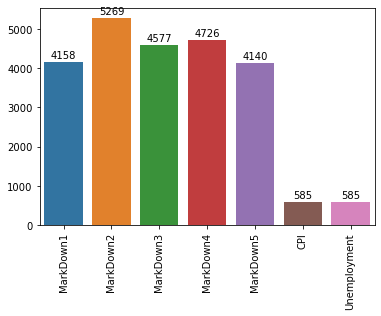

In [12]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
sb.barplot(na_counts.index.values, na_counts);

# get the current tick locations and labels
plt.xticks(rotation=90);

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    
    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+300, count, ha = 'center', va='top')

Note - **The seaborn.barplot()** is a useful function to keep in mind if your data is summarized and you still want to build a bar chart. If your data is not yet summarized, however, just use the **countplot function** so that you don't need to do extra summarization work. In addition, you'll see what barplot's main purpose is in the next lesson when we discuss adaptations of univariate plots for plotting bivariate data.